In [165]:
%matplotlib notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

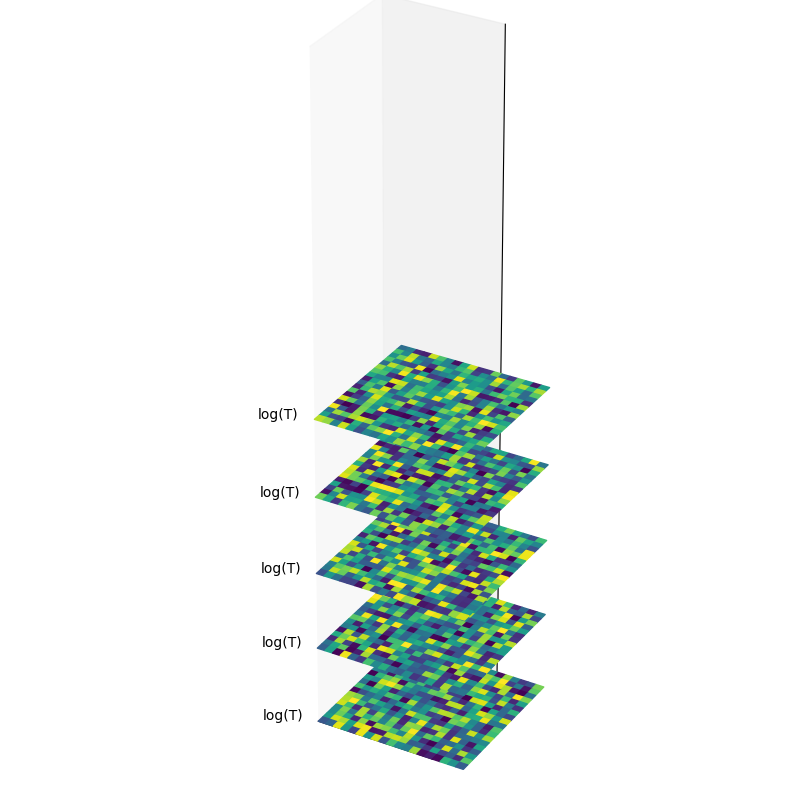

In [81]:
# Function to create random images
def create_random_image(height, width):
    return np.random.rand(height, width)

# Number of images
height, width = 20, 20
titles = ["log(T)", "log(EM)", "AIA 171 A", "Hα", "Ca II K"]
num_images = len(titles)


# Create a list of random images
images = [create_random_image(height, width) for _ in range(num_images)]

# Create 3D plot
fig = plt.figure(figsize=[10,30])
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

# Adjust the spacing between the layers
spacing = 10      # Change this value to adjust spacing
text_spacing = 2  # Spacing between text and layers

# Function to plot an image at a specific layer
def plot_image(ax, img, layer, spacing):
    x, y = np.mgrid[0:img.shape[1], 0:img.shape[0]]
    x = x.T
    y = y.T
    z = np.ones_like(x) * layer * spacing
    ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.viridis(img/img.max()), shade=False)
    return x, y, z

# Plot each random image in its layer
for i, img in enumerate(images):
    x, y, z = plot_image(ax, img, i, spacing)
    # ax.text(x.shape[1], y.shape[0]//2, i*spacing, f'Layer {i + 1}', color='black')
    ax.text(x[0,0] - text_spacing, y[0,0], i * spacing, f'{titles[0]}', color='black', fontsize=10, ha='right', va='center')


# Set labels and view angle
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Layer')
ax.view_init(elev=30, azim=-60)  # Adjust the elevation and azimuth to get a better view

limits = 15
ax.set_xlim(0, limits)
ax.set_ylim(0, limits)
ax.set_zlim(0, limits*num_images + spacing)
ax.set_box_aspect([limits, limits, limits*num_images])
# ax.set_box_aspect([1, 1, (limits*num_images + spacing) / limits])

# Hide the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()

In [74]:
# # Set aspect ratio and limits
# limits = 20
# ax.set_xlim(0, limits)
# ax.set_ylim(0, limits)
# ax.set_zlim(0, limits * num_images + spacing)
# ax.set_box_aspect([1, 1, (limits * num_images + spacing) / limits])

# # Hide the axes
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

In [84]:
import warnings
warnings.filterwarnings('ignore')
import os
import glob
from sunpy.net import Fido, attrs as a
import sunpy.map
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
from sunpy.coordinates import frames, get_body_heliographic_stonyhurst, get_horizons_coord

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

In [144]:
YEAR = '2024'
MONTH = '05'
DAY = '14'
start_hour = '16'
end_hour = '23'
start_minute = '30'
end_minute = '59'

In [95]:
[x for x in dir(a) if not x.startswith('_')]

['AttrAnd',
 'AttrOr',
 'Detector',
 'ExtentType',
 'Instrument',
 'Level',
 'Physobs',
 'Provider',
 'Resolution',
 'Sample',
 'Source',
 'Time',
 'Wavelength',
 'cdaweb',
 'goes',
 'hek',
 'helio',
 'jsoc',
 'vso']

In [119]:
result = Fido.search(a.Time(f'{YEAR}-{MONTH}-{DAY} {start_hour}:{start_minute}',
                            f'{YEAR}-{MONTH}-{DAY} {end_hour}:{end_minute}'),
                            a.Instrument('SECCHI'), 
                            # a.Detector('C2'),
                            # a.Sample(1*u.min)
)

In [120]:
print(result)

Results from 0 Providers:




In [130]:
import hvpy
from sunpy.time import parse_time
# from sunpy.util.config import get_and_create_download_dir
# print(get_and_create_download_dir())

In [128]:
dirpath = '/home/mnedal/data'

try:
    os.makedirs(f'{dirpath}/SECCHI/', exist_ok=True)
except:
    pass

In [131]:
cor2_file = hvpy.save_file(hvpy.getJP2Image(parse_time('2014/05/15 07:54').datetime,
                                            hvpy.DataSource.COR2_A.value),
                           f'{dirpath}/SECCHI/COR2.jp2')
cor2_map = sunpy.map.Map(cor2_file)

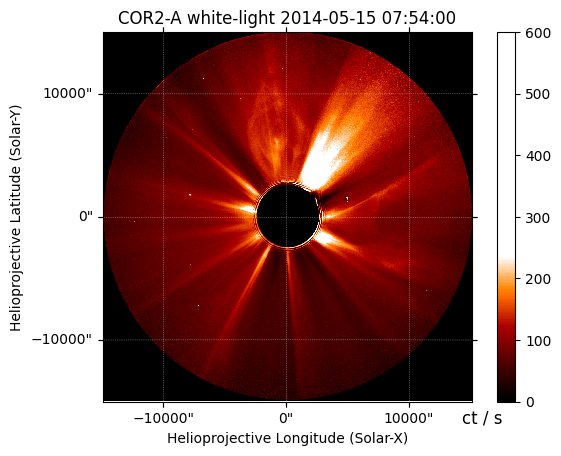

In [139]:
cor2_map.peek(vmin=0, vmax=6e2)

In [188]:
start_hour = '19'
start_minute = '30'

cor2_file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.COR2_A.value),
                           f'{dirpath}/SECCHI/COR2_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
cor2_map = sunpy.map.Map(cor2_file)

<IPython.core.display.Javascript object>


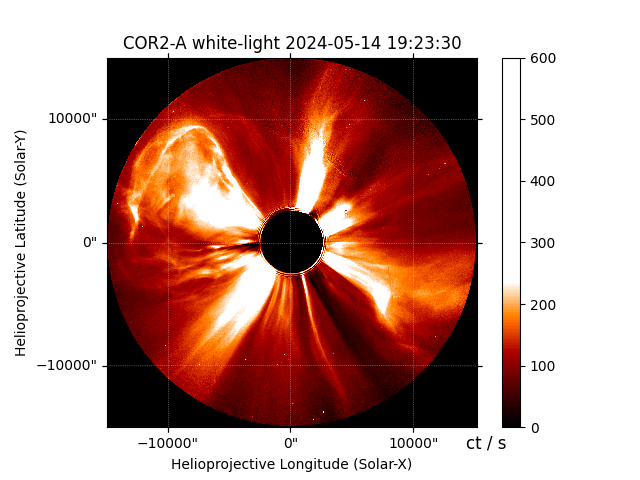

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


In [189]:
cor2_map.peek(vmin=0, vmax=6e2)

<IPython.core.display.Javascript object>


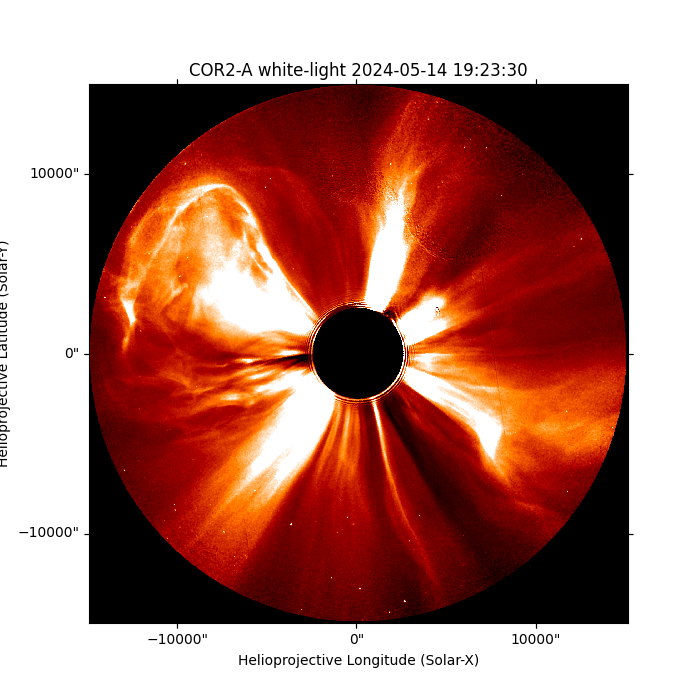

In [190]:
from astropy.visualization import ImageNormalize


min_range = 0
max_range = 6e2
cor2_map.plot_settings['norm'] = ImageNormalize(vmin=min_range, vmax=max_range)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=cor2_map)
cor2_map.plot(axes=ax)
ax.grid(False)
plt.show()

<IPython.core.display.Javascript object>


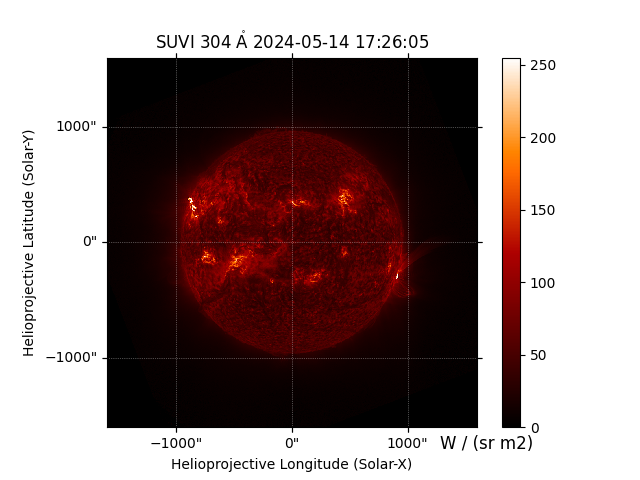

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


In [271]:
start_hour = '17'
start_minute = '25'

suvi_file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.SUVI_304.value),
                           f'{dirpath}/suvi304_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
suvi_map = sunpy.map.Map(suvi_file)
suvi_map.peek()

In [197]:
[x for x in dir(hvpy.DataSource) if not x.startswith('_')]

['AIA_131',
 'AIA_1600',
 'AIA_1700',
 'AIA_171',
 'AIA_193',
 'AIA_211',
 'AIA_304',
 'AIA_335',
 'AIA_4500',
 'AIA_94',
 'COR1_A',
 'COR1_B',
 'COR2_A',
 'COR2_B',
 'COSMO_KCOR',
 'EIT_171',
 'EIT_195',
 'EIT_284',
 'EIT_304',
 'EUI_FSI_174',
 'EUI_FSI_304',
 'EUI_HRI_1216',
 'EUI_HRI_174',
 'EUVI_A_171',
 'EUVI_A_195',
 'EUVI_A_284',
 'EUVI_A_304',
 'EUVI_B_171',
 'EUVI_B_195',
 'EUVI_B_284',
 'EUVI_B_304',
 'GONG_FARSIDE',
 'GONG_H_ALPHA',
 'GONG_MAGNETOGRAM',
 'HMI_INT',
 'HMI_MAG',
 'IRIS_SJI_1330',
 'IRIS_SJI_1400',
 'IRIS_SJI_2796',
 'IRIS_SJI_2832',
 'LASCO_C2',
 'LASCO_C3',
 'MDI_INT',
 'MDI_MAG',
 'SUVI_131',
 'SUVI_171',
 'SUVI_195',
 'SUVI_284',
 'SUVI_304',
 'SUVI_94',
 'SWAP_174',
 'SXT_ALMGMN',
 'SXT_THIN_AL',
 'SXT_WHITE_LIGHT',
 'TRACE_1216',
 'TRACE_1550',
 'TRACE_1600',
 'TRACE_1700',
 'TRACE_171',
 'TRACE_195',
 'TRACE_284',
 'TRACE_WHITE_LIGHT',
 'XRT_AL_MED_AL_MESH',
 'XRT_AL_MED_AL_THICK',
 'XRT_AL_MED_ANY',
 'XRT_AL_MED_BE_THICK',
 'XRT_AL_MED_GBAND',
 'XRT_AL_

In [252]:
start_hour = '17'
start_minute = '25'

cor1_file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.COR1_A.value),
                           f'{dirpath}/SECCHI/COR1_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
cor1_map = sunpy.map.Map(cor1_file)

<IPython.core.display.Javascript object>


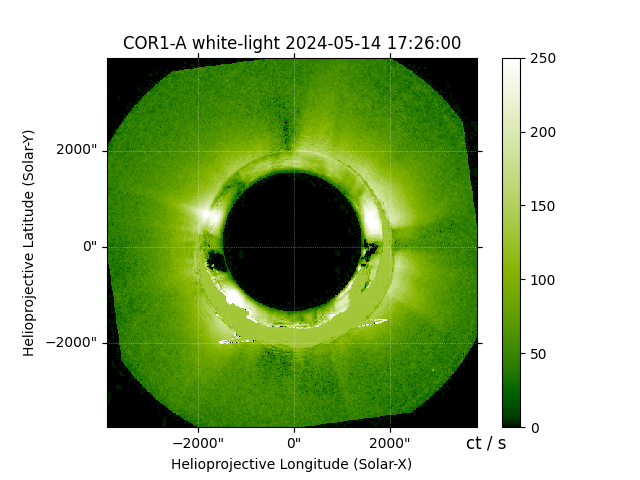

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


In [253]:
cor1_map.peek(vmin=0, vmax=2.5e2)

<IPython.core.display.Javascript object>


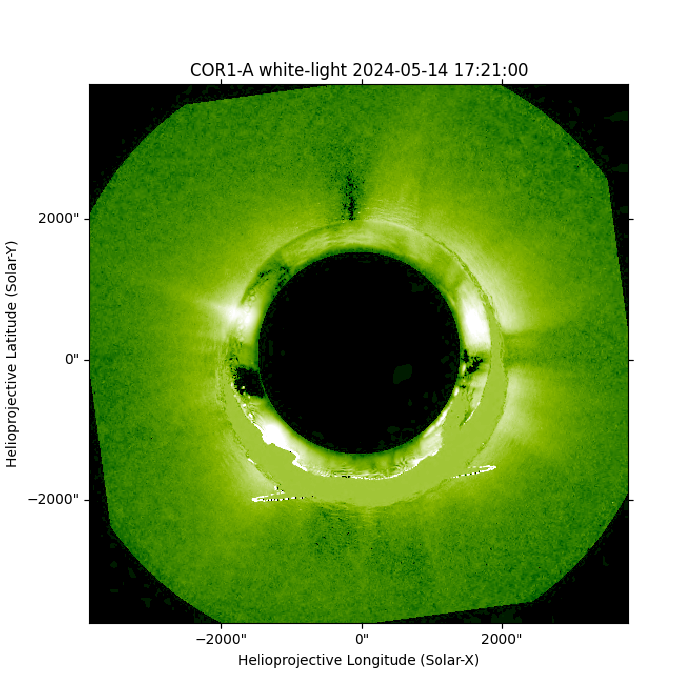

In [245]:
min_range = 0
max_range = 2.5e2
cor1_map.plot_settings['norm'] = ImageNormalize(vmin=min_range, vmax=max_range)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=cor1_map)
cor1_map.plot(axes=ax)
ax.grid(False)
plt.show()

In [255]:
23580/3600

6.55

In [254]:
60*60

3600

In [270]:
os.makedirs(f'{dirpath}/LASCO_C2/', exist_ok=True)
os.makedirs(f'{dirpath}/LASCO_C3/', exist_ok=True)

In [266]:
start_hour = '18'
start_minute = '15'

lasco_c2_file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.LASCO_C2.value),
                           f'{dirpath}/LASCO_C2/LASCO_C2_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
lasco_c2_map = sunpy.map.Map(lasco_c2_file)

<IPython.core.display.Javascript object>


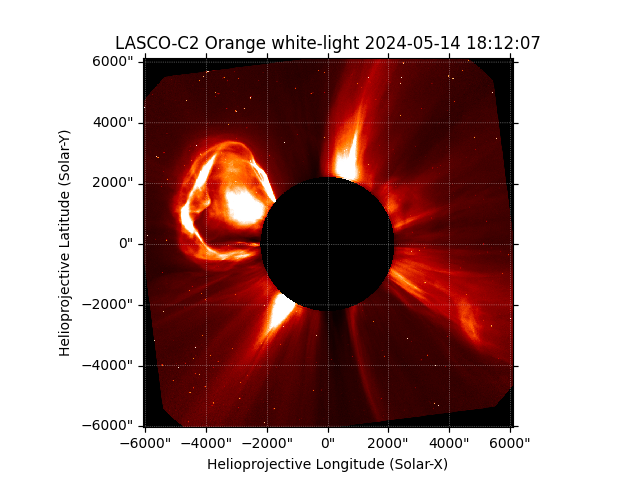

AttributeError: 'int' object has no attribute 'lower'

In [268]:
lasco_c2_map.peek()

<IPython.core.display.Javascript object>


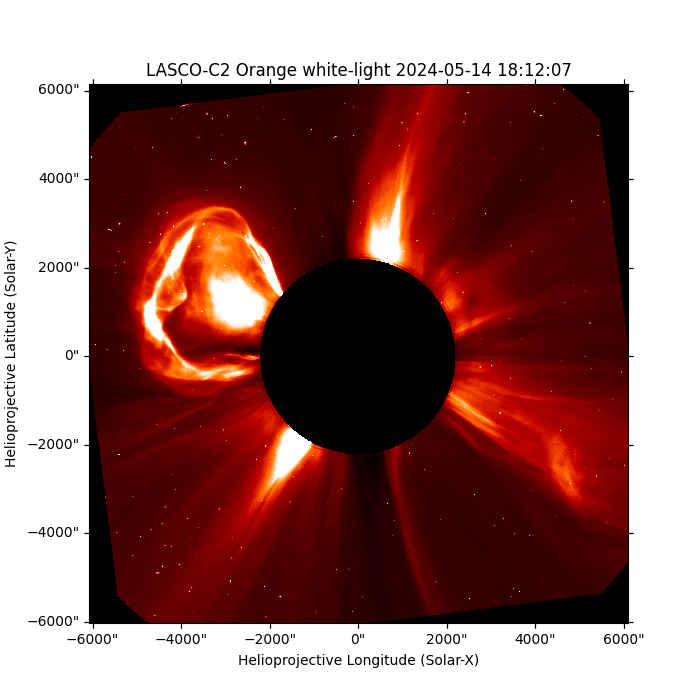

In [269]:
min_range = 0
max_range = 2.5e2
lasco_c2_map.plot_settings['norm'] = ImageNormalize(vmin=min_range, vmax=max_range)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=lasco_c2_map)
lasco_c2_map.plot(axes=ax)
ax.grid(False)
plt.show()

In [278]:
start_hour = '20'
start_minute = '00'

lasco_c3_file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.LASCO_C3.value),
                           f'{dirpath}/LASCO_C3/LASCO_C3_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
lasco_c3_map = sunpy.map.Map(lasco_c3_file)

<IPython.core.display.Javascript object>


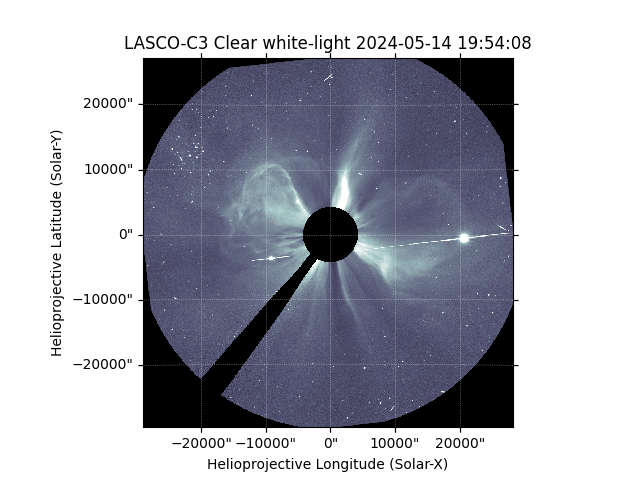

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


AttributeError: 'int' object has no attribute 'lower'

In [279]:
lasco_c3_map.peek()

<IPython.core.display.Javascript object>


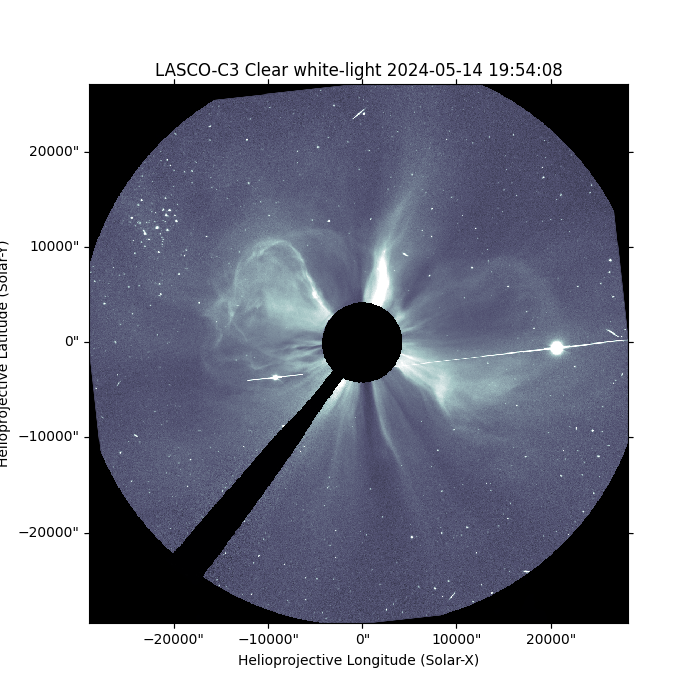

In [280]:
min_range = 0
max_range = 2.5e2
lasco_c3_map.plot_settings['norm'] = ImageNormalize(vmin=min_range, vmax=max_range)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=lasco_c3_map)
lasco_c3_map.plot(axes=ax)
ax.grid(False)
plt.show()